# 代码及其运行结果

## 生成数据集

In [47]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from matplotlib.font_manager import FontProperties #字体管理器
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score

X, y = make_blobs(n_samples=1000, n_features=3, centers=[[3, 3, 3], [0, 0, 0], [1, 1, 1], [2, 2, 2]],
                  cluster_std=[0.3, 0.4, 0.5, 0.2], random_state=9)

## 降维前的散点图

C:\Users\liang\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


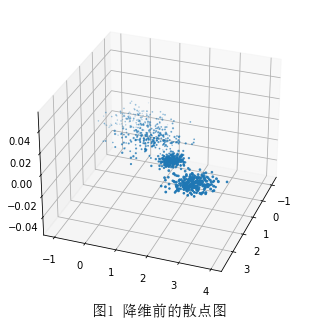

In [48]:
#设置汉字格式
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')
plt.title(u'图1 降维前的散点图',y=-0.1,fontproperties=font)
plt.show()

## 降维后的散点图

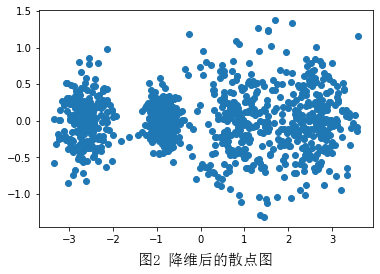

In [49]:
# 降维到二维
pca = PCA(n_components=2)
pca.fit(X)

# 降维后的数据
X_new = pca.transform(X)

fig = plt.figure()
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o')
plt.title(u'图2 降维后的散点图',y=-0.2,fontproperties=font)
plt.show()

## 不同k值聚类后的散点图

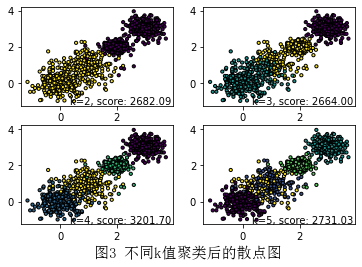

In [50]:
for index,k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = KMeans(n_clusters=k, random_state=9).fit_predict(X) #预测值
    score=metrics.calinski_harabasz_score(X, y_pred) #方差比准则
    plt.scatter(X[:, 0], X[:, 1], c=y_pred,s=10,edgecolor='k') 
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)), #文本注释，标注关键信息
            transform=plt.gca().transAxes, size=10,horizontalalignment='right')
plt.title(u'图3 不同k值聚类后的散点图',x=-0.1,y=-0.4,fontproperties=font)
plt.show()

## 聚类评价指标(NMI)

In [58]:
for i in range(20):
    model = KMeans(n_clusters=3,
                  init='random',
                  n_init=1).fit(X) #调用K-means模型
    y_pred = model.labels_ #输出预测标签
    clu_centers = model.cluster_centers_ #输出聚类中心
    print("NMI's value:",metrics.normalized_mutual_info_score(y,y_pred))

NMI's value: 0.7706341314163643
NMI's value: 0.7364138321619262
NMI's value: 0.7364291832374604
NMI's value: 0.7370289040607152
NMI's value: 0.7370289040607152
NMI's value: 0.7370289040607152
NMI's value: 0.7789589334325193
NMI's value: 0.7370289040607152
NMI's value: 0.7370289040607152
NMI's value: 0.7812384108744751
NMI's value: 0.7364291832374604
NMI's value: 0.7370289040607152
NMI's value: 0.7364291832374604
NMI's value: 0.7364138321619262
NMI's value: 0.7843845397460657
NMI's value: 0.7706341314163643
NMI's value: 0.7370289040607151
NMI's value: 0.7370289040607151
NMI's value: 0.775534207693367
NMI's value: 0.736921113753183
